In [119]:
# 하이퍼파라미터 - 모델을 만들 때 모델에 영향을 주는(관여하는) 모든 요인(수치값)
# 핸즈온 머신러닝 8장 - 차원축소
# RandomizedSearchCV
# PCA 차원축소
# 압축 후 복원을 하면 중요한 성분만 남아 노이즈 제거 효과가 있음
# 전치행렬 곱
# Randomized PCA
# 점진적 PCA - mini-batch, 랜덤하게 데이터 가져옴, 일반적으로 중복 허용

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = True) # 28 x 28 로 되어 있는 흑백이미지

In [121]:
mnist.data

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0         0         0   
3            0  ...         0         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
69995        0  ...         0         0         0         0         0   
69996        0  ...         0         0         0         0         0   
69997        0  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
69995         0         0         0         0         0  
69996         0         0         0         0         0  
69997         0         0         0         0         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[70000 rows x 784 columns]

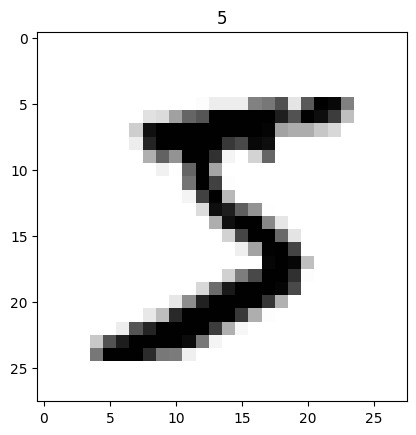

In [122]:
# 핸즈온 3장
mnist.data.iloc[0].values
plt.imshow(mnist.data.iloc[0].values.reshape(28,28),cmap='gray_r')
plt.title(mnist.target[0])
plt.show()

In [123]:
import seaborn as sns
from sklearn.decomposition import PCA

iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']

pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
X_PCA

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

<Axes: xlabel='0', ylabel='1'>

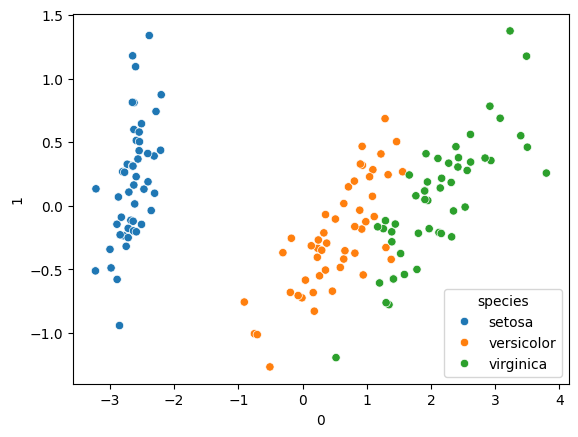

In [124]:
iris = pd.DataFrame(X_PCA)
iris['species'] = y

sns.scatterplot(data=iris, x=0, y=1, hue='species')

In [125]:
# 배열의 누적합
import numpy as np
arr = np.array([1,2,3,4])
print(arr)
cumsum_arr = np.cumsum(arr)
cumsum_arr

[1 2 3 4]


array([ 1,  3,  6, 10])

In [126]:
# 적절한 주성분 개수 찾기 - 분산이 95% 적당
pca = PCA()
pca.fit(mnist.data)
# 설명된 분산의 누적의 합이 0.95 이상이 되는 차원의 개수
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851456, 0.6213047 , 0.63317742, 0.64470679,
       0.65536719, 0.66546513, 0.67505665, 0.684153  , 0.69298586,
       0.70137405, 0.70947236, 0.71732954, 0.72473217, 0.73163231,
       0.73819375, 0.74464845, 0.75065664, 0.75651276, 0.7621803 ,
       0.767615  , 0.77266217, 0.77753297, 0.78232252, 0.78699846,
       0.79154214, 0.79599132, 0.80017349, 0.80413513, 0.8079722 ,
       0.81173005, 0.81534432, 0.81883456, 0.82222188, 0.82541884,
       0.82858738, 0.83168883, 0.83465363, 0.83752465, 0.84034978,
       0.84304401, 0.84572793, 0.84829303, 0.85082471, 0.85327119,
       0.85566821, 0.85805402, 0.86034636, 0.86255585, 0.86468645,
       0.86674963, 0.86877744, 0.87072779, 0.8726425 , 0.87452799,
       0.87639775, 0.8781988 , 0.87996667, 0.88170025, 0.88334

In [127]:
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [128]:
pca = PCA(n_components=0.95)
mnist.data_pca = pca.fit_transform(mnist.data)
pca.n_components_

154

설명된 분산의 시각화

In [129]:
cumsum

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851456, 0.6213047 , 0.63317742, 0.64470679,
       0.65536719, 0.66546513, 0.67505665, 0.684153  , 0.69298586,
       0.70137405, 0.70947236, 0.71732954, 0.72473217, 0.73163231,
       0.73819375, 0.74464845, 0.75065664, 0.75651276, 0.7621803 ,
       0.767615  , 0.77266217, 0.77753297, 0.78232252, 0.78699846,
       0.79154214, 0.79599132, 0.80017349, 0.80413513, 0.8079722 ,
       0.81173005, 0.81534432, 0.81883456, 0.82222188, 0.82541884,
       0.82858738, 0.83168883, 0.83465363, 0.83752465, 0.84034978,
       0.84304401, 0.84572793, 0.84829303, 0.85082471, 0.85327119,
       0.85566821, 0.85805402, 0.86034636, 0.86255585, 0.86468645,
       0.86674963, 0.86877744, 0.87072779, 0.8726425 , 0.87452799,
       0.87639775, 0.8781988 , 0.87996667, 0.88170025, 0.88334

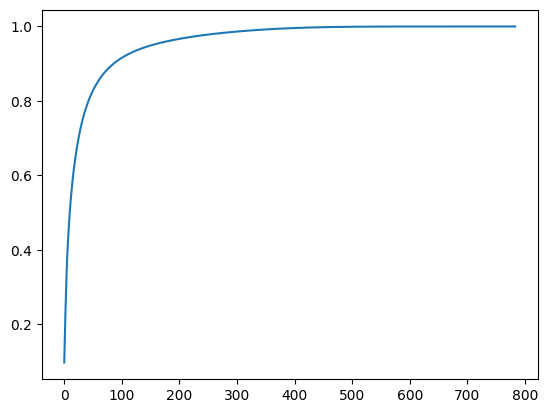

In [130]:
pca = PCA()
pca.fit(mnist.data)
# 설명된 분산의 비율이 95% 또는 90%
n_component_90 = np.argmax(cumsum >= 90)
n_component_95 = np.argmax(cumsum >= 95)
plt.plot(cumsum) # 손실이 적으면서 차수를 많이 줄일 수 있음
plt.show()

In [131]:
# 1. pca를 적용하지 않고 전체 특성을 다 사용한 경우
# 2. pca를 적용해서 차원(특성)을 줄이고 모델에 적용

In [132]:
mnist.data

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0         0         0   
3            0  ...         0         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
69995        0  ...         0         0         0         0         0   
69996        0  ...         0         0         0         0         0   
69997        0  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
69995         0         0         0         0         0  
69996         0         0         0         0         0  
69997         0         0         0         0         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[70000 rows x 784 columns]

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, stratify = mnist.target, random_state=42)

In [134]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1726
           1       0.98      0.98      0.98      1969
           2       0.97      0.97      0.97      1748
           3       0.96      0.95      0.96      1785
           4       0.97      0.96      0.96      1706
           5       0.97      0.96      0.97      1578
           6       0.97      0.98      0.98      1719
           7       0.97      0.97      0.97      1823
           8       0.95      0.95      0.95      1706
           9       0.94      0.94      0.94      1740

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



In [136]:
pca_95 = PCA(n_components=0.95)
mnist_pca_95 = pca_95.fit_transform(mnist.data)
x_train, x_test, y_train, y_test = train_test_split(mnist_pca_95, mnist.target,stratify=mnist.target,random_state=42)
rfc = RandomForestClassifier()

In [137]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [138]:
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1726
           1       0.98      0.98      0.98      1969
           2       0.95      0.94      0.94      1748
           3       0.91      0.93      0.92      1785
           4       0.94      0.94      0.94      1706
           5       0.93      0.93      0.93      1578
           6       0.96      0.97      0.97      1719
           7       0.96      0.95      0.95      1823
           8       0.92      0.91      0.92      1706
           9       0.93      0.91      0.92      1740

    accuracy                           0.95     17500
   macro avg       0.94      0.94      0.94     17500
weighted avg       0.95      0.95      0.95     17500



- 하이퍼파라미터 튜닝
- 적절한 component 개수
- 모델의 파라미터

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('pca', PCA(random_state=42)),
    ('rfc',RandomForestClassifier(random_state=42)),
])
# 하이퍼파라미터
params = {
    'pca__n_components' : np.arange(10,80), # 언더바 2개 유의
    'rfc__n_estimators' : np.arange(50, 500)
} # 점수가 낮으면 알아서 멈춤
rsearch = RandomizedSearchCV(pipeline, params, cv=3, random_state=42)
rsearch.fit(mnist.data[:10000],mnist.target[:10000]) # randomizedSearchCV로 train_test_split 없이 진행

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('rfc',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [140]:
rsearch.best_params_
best_model = rsearch.best_estimator_
x_train,x_test,y_train,y_test = train_test_split(mnist.data,mnist.target, stratify=mnist.target,random_state=42)
best_model.fit(x_train, y_train)
print(classification_report(y_test, best_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1726
           1       0.98      0.98      0.98      1969
           2       0.96      0.95      0.96      1748
           3       0.93      0.94      0.94      1785
           4       0.95      0.95      0.95      1706
           5       0.94      0.95      0.94      1578
           6       0.96      0.98      0.97      1719
           7       0.96      0.95      0.96      1823
           8       0.93      0.93      0.93      1706
           9       0.94      0.93      0.93      1740

    accuracy                           0.95     17500
   macro avg       0.95      0.95      0.95     17500
weighted avg       0.95      0.95      0.95     17500



In [141]:
# 원본 이미지, 주성분 분석한 이미지, 복원한 이미지

Text(0.5, 1.0, 'inverse')

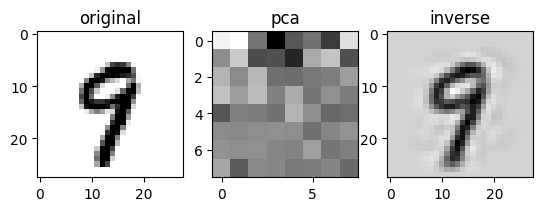

In [142]:
plt.subplot(1,3,1)
plt.imshow(x_train.iloc[0].values.reshape(28,28), cmap='binary')
plt.title('original')

plt.subplot(1,3,2)
pca = PCA(n_components=64)
pca_data = pca.fit_transform(x_train)
plt.imshow(pca_data[0].reshape(8,8), cmap='binary')
plt.title('pca')

plt.subplot(1,3,3)
pca_data_inverse = pca.inverse_transform(pca_data)
plt.imshow(pca_data_inverse[0].reshape(28,28), cmap='binary')
plt.title('inverse')

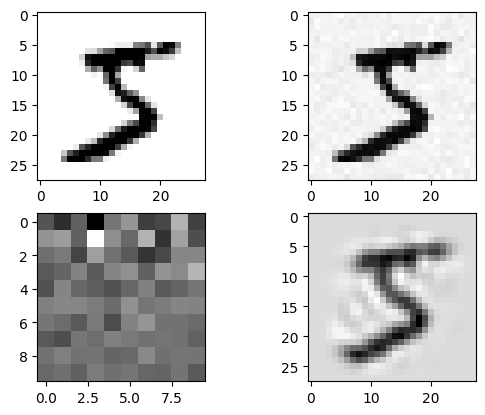

In [143]:
# PCA의 부가적인 기능으로는 주성분을 분석을 통해 차원을 축소하면 주요 특성만 추출되는 효과를 보기 때문에
# 약간의 노이즈가 있는 경우 주성분 분석한 후 inverse했을 때 노이즈가 제거되는 효과가 있다
np.random.seed(45)
noise_rate = 0.2
x_noise = mnist.data*noise_rate + np.random.normal(size=mnist.data.shape)
plt.subplot(2,2,1)
plt.imshow(mnist.data.iloc[0].values.reshape(28,28),cmap='gray_r')

plt.subplot(2,2,2)
plt.imshow(x_noise.iloc[0].values.reshape(28,28),cmap='gray_r')

pca = PCA(n_components=100)
x_noise_pca = pca.fit_transform(x_noise)
plt.subplot(2,2,3)
plt.imshow(x_noise_pca[0].reshape(10,10),cmap='gray_r')

plt.subplot(2,2,4)
x_noise_pca_inverse = pca.inverse_transform(x_noise_pca)
plt.imshow(x_noise_pca_inverse[0].reshape(28,28),cmap='gray_r')

- 랜덤 PCA
    - 확률적 알고리즘
        - 매개변수 svd_solver = 'randomized' 지정 d개의 주성분에 대한 근사값을 빠르게 찾는다(일반적인)
        - 특정상황에서는 더 빠르지 않을 수 있다.
        - 기본 값이 auto , 피처의 개수가 500보다 크고  n_components 80% 보다 작게 설정하면 자동으로 randomized가 적용
        - full로 설정하면 완전한 PCA 실행하게 된다

In [144]:
rnd_pca = PCA(n_components=1, svd_solver = 'randomized', random_state=42)
rnd_pca.fit_transform(mnist.data)

array([[ 122.26346449],
       [1010.49707933],
       [ -58.99192461],
       ...,
       [-271.51108909],
       [-310.23585673],
       [1058.86179839]])

In [145]:
pca = PCA(n_components=1, random_state=42)
pca.fit_transform(mnist.data)

array([[ 122.25525533],
       [1010.49400346],
       [ -58.99594719],
       ...,
       [-271.50701323],
       [-310.22482291],
       [1058.86212574]])

In [146]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |
 |  Principal component analysis (PCA).
 |
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |
 |  With sparse inputs, the ARPACK implementation of the truncated SVD can be
 |  used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
 |  may consider :class:`TruncatedSVD` where the data are not centered.
 |
 |  No

- 점진적 PCA
    - 데이터가 큰 경우 모든 피처를 메모리에 올려놓고 연산
    - 훈련데이터를 미니배치로 나누고 각각에 대해서 pca 적용
    - partial_fit() 적용

In [147]:
from sklearn.decomposition import IncrementalPCA
n_batch = 100
ipca = IncrementalPCA(n_components=5)
np.array_split(np.array([1,2,3,4,5,6,7,8,9,10]), 5)
for data in np.array_split(mnist.data,n_batch):
    ipca.partial_fit(data)
# 병렬학습 이후에 transform을 이용해서 데이터 변환
ipca_data = ipca.transform(mnist.data)
ipca_data.shape

c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(70000, 5)

- income.zip
    - 1994년도 데이터
    - 미국 인구조사국 데이터베이스, 통계정보, 경제정보를 포함
    - 한 사람이 연간 50,000달러 이상의 수입 예측

In [148]:
import pandas as pd
df = pd.read_csv(r'C:\Github\python_study\Pandas\pca2.csv')

In [149]:
print(df.columns)
# age
# workclass : 직업군
# fnlwgt : final weight 최종가중치 - 특정인구의 집단이 전체 인구에서 얼마나 많은 비중을 차지하는지 지표
# 값이 클수록 비중이 높다
# education : 학력
# education.num : education을 수치로 표현
# marital.status : 결혼 유무
# occupatiom : 직업군
# relationship : 가족내 관계 - 자녀, 아내,..
# race : 인종
# capital.gain : 자본이득 개인이 부동신 기타 자산에서 발생한 이득
# capital.loss : 반대개념
# hours.per.week : 주당 근무시간
# native.country : 출생국가
# income : 소득...(50k 이상 이하)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [151]:
df.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [152]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [153]:
# # ? 처리는 ... 결측치로 처리
# import numpy as np
# df = df.replace("?", np.nan)
# df

# df[(df == '?').any(axis=1)]

df[df == '?'] = np.nan
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                    NaN  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                    NaN      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [154]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [155]:
df.isna().mean()*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [156]:
df['capital.gain'].value_counts()

capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: count, Length: 119, dtype: int64

In [157]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [158]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [159]:
df['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [160]:
# 1차 목표 - basemodel
# 결측치는 제거, 베이스 모델을 구축해서(RandomForestClassifier) classification_report 성능 평가

In [161]:
df_nona = df.dropna()
df_nona.head()

age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K

In [162]:
df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [163]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
rfc = RandomForestClassifier()

In [164]:
# num_df = df_nona.select_dtypes('int','float')
# num_df.head()
# obj_df = df_nona.select_dtypes('object','category')
# obj_df.head()
# from sklearn.preprocessing import OrdinalEncoder
# oe = OrdinalEncoder()
# obj_df_oe = pd.DataFrame(oe.fit_transform(obj_df))
# obj_df_oe

In [165]:
X = df_nona.drop(columns=['income'])
y = df_nona['income']

In [166]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
category_df = X.select_dtypes(include=['object','category'])
numeric_df = X.select_dtypes(include=['int','float'])
for col in category_df.columns:
    X[col] = oe.fit_transform(X[[col]])
X.head()

age  workclass  fnlwgt  education  education.num  marital.status  \
1   82        2.0  132870       11.0              9             6.0   
3   54        2.0  140359        5.0              4             0.0   
4   41        2.0  264663       15.0             10             5.0   
5   34        2.0  216864       11.0              9             0.0   
6   38        2.0  150601        0.0              6             5.0   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
1         3.0           1.0   4.0  0.0             0          4356   
3         6.0           4.0   4.0  0.0             0          3900   
4         9.0           3.0   4.0  0.0             0          3900   
5         7.0           4.0   4.0  0.0             0          3770   
6         0.0           4.0   4.0  1.0             0          3770   

   hours.per.week  native.country  
1              18            38.0  
3              40            38.0  
4              40            38.0  
5              45            38.0  
6              40            38.0

In [167]:
from sklearn.preprocessing import StandardScaler # tree 이므로 적용 상관 없음
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled[:3]

array([[ 3.31662977e+00, -2.08954638e-01, -5.38790124e-01,
         1.74762773e-01, -4.39738199e-01,  2.28296868e+00,
        -7.34545341e-01, -2.61248926e-01,  3.85047902e-01,
        -1.44340518e+00, -1.47444622e-01,  1.05558137e+01,
        -1.91416096e+00,  2.64923943e-01],
       [ 1.18483085e+00, -2.08954638e-01, -4.67905945e-01,
        -1.39911971e+00, -2.40055892e+00, -1.72239640e+00,
         9.96398104e-03,  1.61221520e+00,  3.85047902e-01,
        -1.44340518e+00, -1.47444622e-01,  9.42791507e+00,
        -7.77341106e-02,  2.64923943e-01],
       [ 1.95067063e-01, -2.08954638e-01,  7.08644595e-01,
         1.22401776e+00, -4.75740537e-02,  1.61540783e+00,
         7.54473303e-01,  9.87727158e-01,  3.85047902e-01,
        -1.44340518e+00, -1.47444622e-01,  9.42791507e+00,
        -7.77341106e-02,  2.64923943e-01]])

In [168]:
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)

In [169]:
# 모델 설정
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [170]:
# 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      5664
        >50K       0.76      0.64      0.70      1877

    accuracy                           0.86      7541
   macro avg       0.83      0.79      0.80      7541
weighted avg       0.86      0.86      0.86      7541



- 성능 높이기
    - 피처엔지니어링 : PCA, 상관관계를 통해서 피처조정, 피처들의 관계를 통해서 새로운 피처 생성, 도메인 지식을 이요해서 불필요한 피처를 제거
    - 결측치 처리 : 0으로 또는 평균으로 또는 중위수 또는 주위 피처들의 관계를 고려해서 group by 등등
    - 모델은 다양하게 적용 - 앙상블 계열
    - 최상위 모델이 선정되면 - 하이퍼파라미터 튜닝

In [171]:
pca = PCA()
X_pca = pca.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X, y, stratify=y, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [172]:
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      5664
        >50K       0.77      0.64      0.70      1877

    accuracy                           0.86      7541
   macro avg       0.83      0.79      0.80      7541
weighted avg       0.86      0.86      0.86      7541



<Axes: >

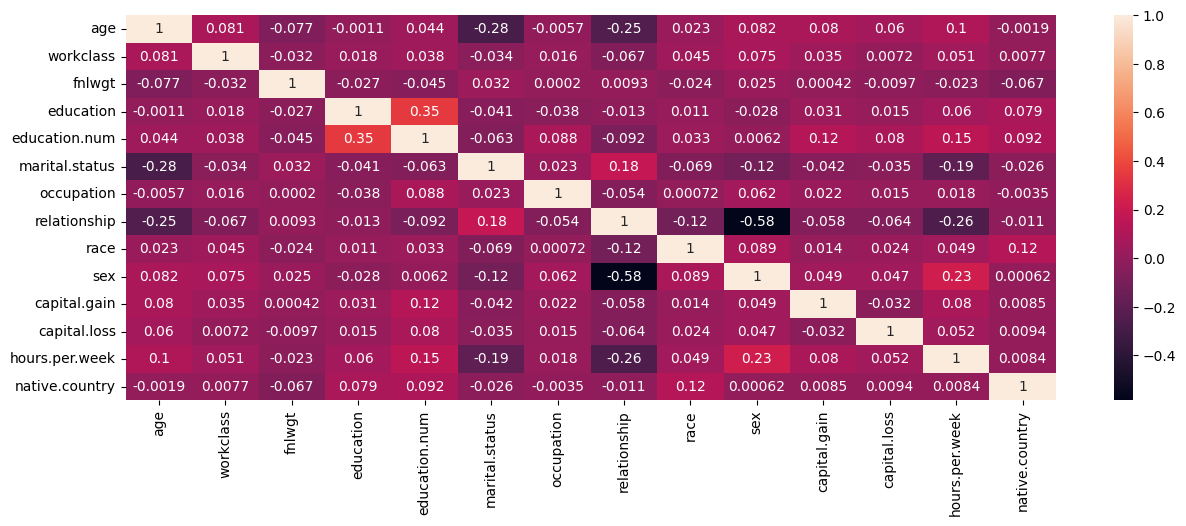

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(X.corr(),annot=True)

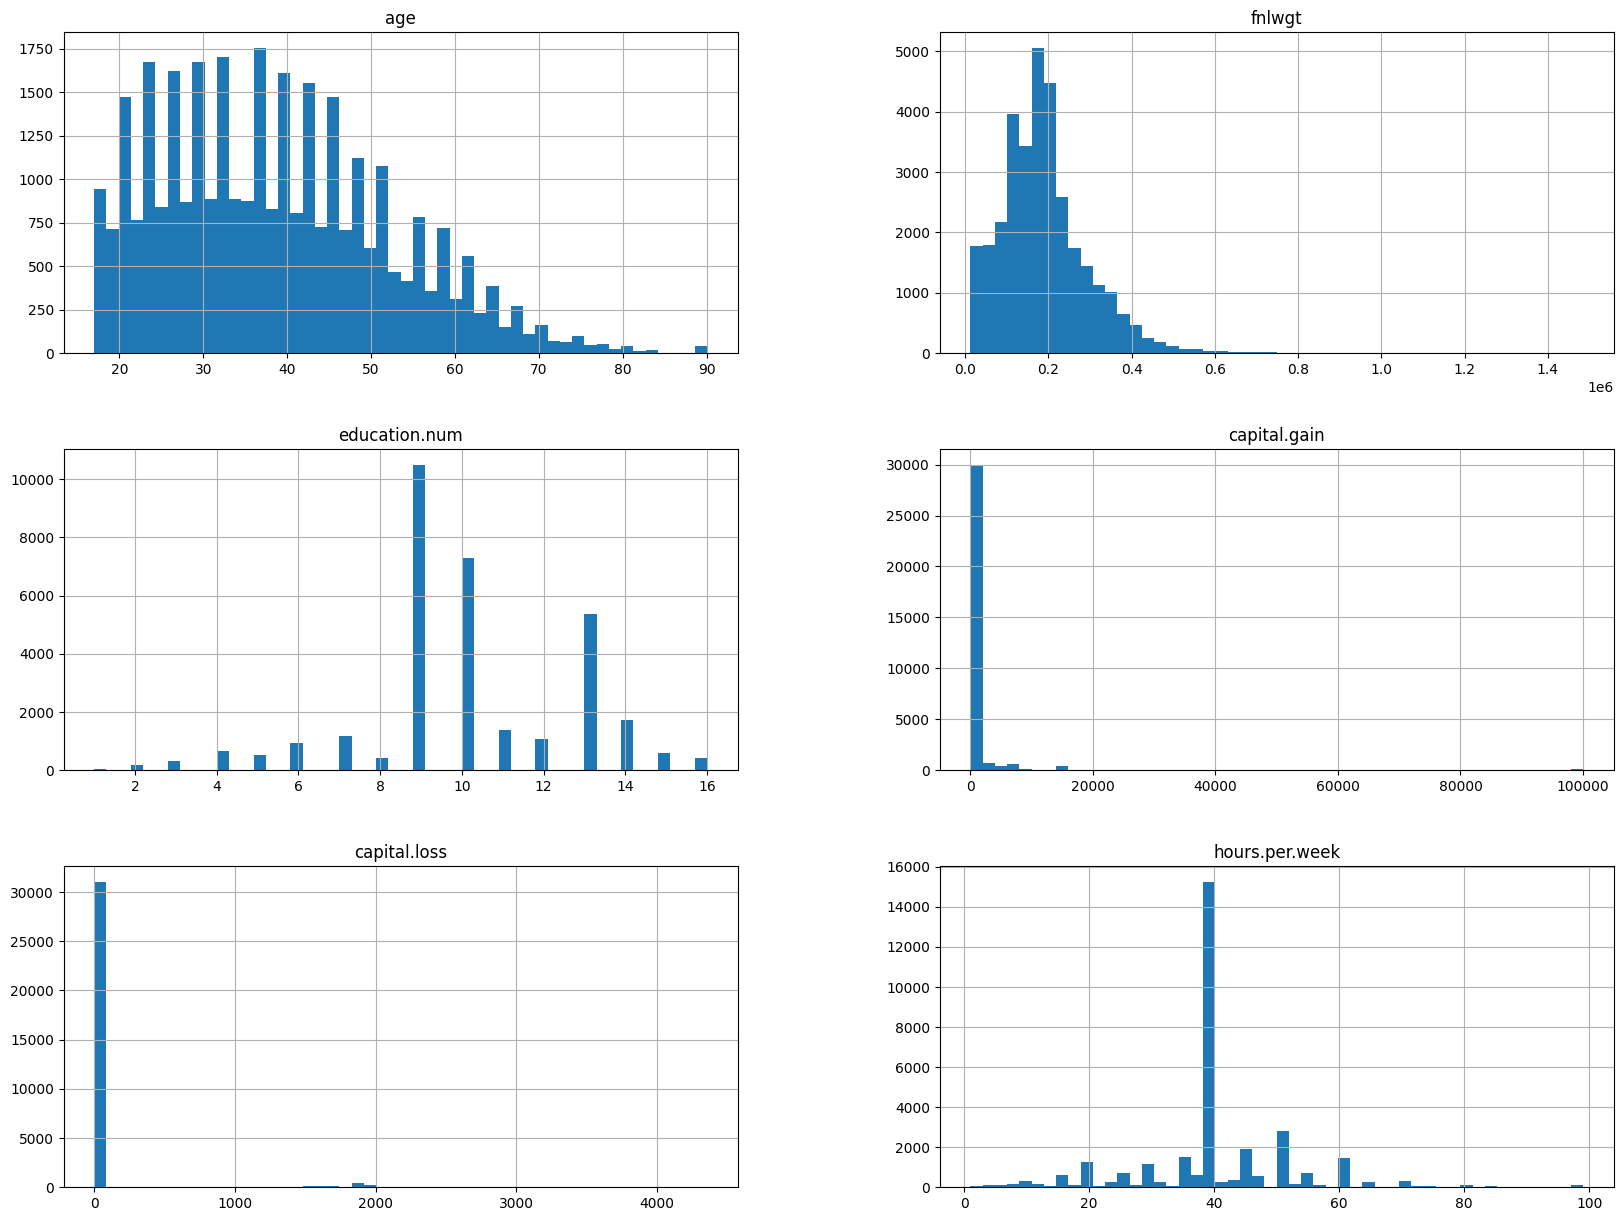

In [174]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [224]:
import pandas as pd
df = pd.read_csv(r'C:\Github\python_study\Pandas\pca2.csv')
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [225]:
# ?를 제거하고 인코딩한 후... 변수들간의 상관관계를 보고 불필요한 피처를 제거목록에 추가
# ? 처리방안 - 최빈값, ffill은 아닐 것 같음
df2 = df.copy()
df2[df2 == '?'] = np.nan
t = df2.isna().sum()

<Axes: >

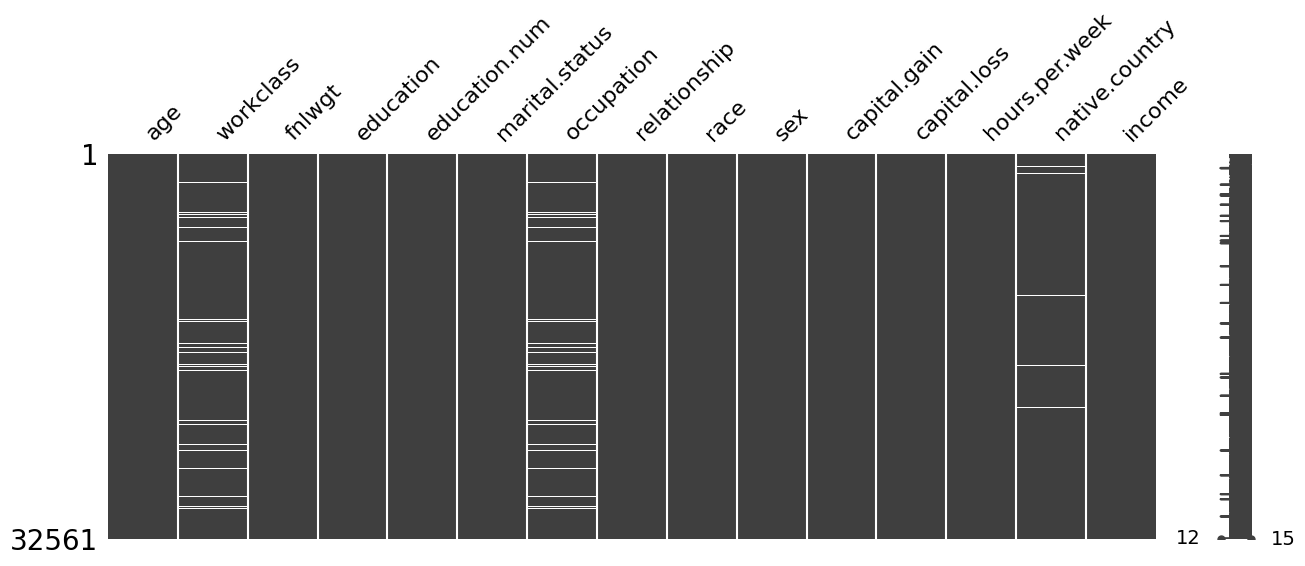

In [226]:
import missingno as msno
msno.matrix(df2,figsize=(15,5))

In [227]:
for nacol in t[t>0].index:
    df2[nacol] = df2[nacol].fillna(df2[nacol].mode()[0])

In [228]:
drop_cols = ['education']

In [229]:
df2.isna().sum() # 최빈값 처리 완료

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [230]:
df2 = df2.drop_duplicates()

In [231]:
category_df = df2.select_dtypes(include=('object','category'))
for col in category_df.columns:
    df2[col] = oe.fit_transform(df2[[col]])

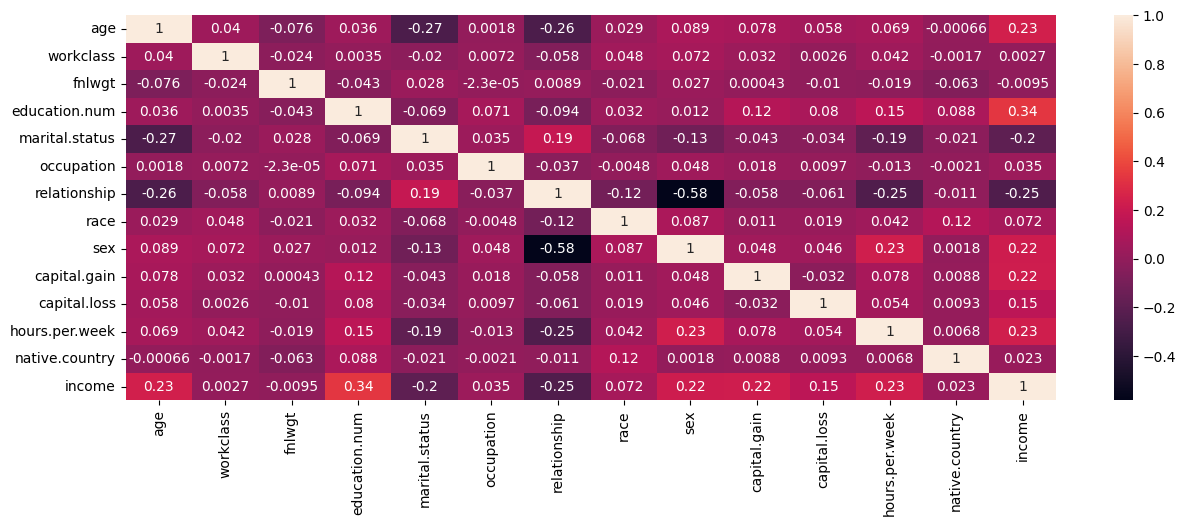

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
df3 = df2.drop('education',axis=1)
sns.heatmap(df3.corr(), annot=True)
plt.show()

In [233]:
# df3['income'] = OrdinalEncoder().fit_transform(df3['income'])
# sns.pairplot(data=df3, vars=df3.columns[:-1], hue='income')

In [251]:
from sklearn.decomposition import PCA
print(df.shape)
pca = PCA(n_components=10)
X = df3.drop('income', axis=1)
y = df3['income']
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(32561, 15)
(32537, 10)


In [252]:
# 데이터 불균형 맞추기
!pip install imbalanced-learn

In [253]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_pca_smote, y_pca_smote = smote.fit_resample(X_pca,y)

In [254]:
x_train,x_test,y_train,y_test = train_test_split(X_pca_smote, y_pca_smote, stratify= y_pca_smote, random_state=42)

In [255]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      6175
         1.0       0.87      0.87      0.87      6174

    accuracy                           0.87     12349
   macro avg       0.87      0.87      0.87     12349
weighted avg       0.87      0.87      0.87     12349



In [256]:
# 원래데이터에서 education, relationship 을 제거한 데이터로
# 다양한 앙상블 모델을 적용해서 성능 변화가 있는지 check
# best model로 최종 하이퍼 파라메터튜닝

In [257]:
import pandas as pd
df = pd.read_csv(r'C:\Github\python_study\Pandas\pca2.csv')
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
vote_model = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('svc', SVC(random_state=42, probability=True)), # svc는 probability를 주어야 soft 가능!
        ('rfc', RandomForestClassifier(random_state=42))
    ], voting = 'soft'
)
vote_model.fit(x_train,y_train)
print(classification_report(y_test, vote_model.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      6175
         1.0       0.84      0.88      0.86      6174

    accuracy                           0.86     12349
   macro avg       0.86      0.86      0.86     12349
weighted avg       0.86      0.86      0.86     12349



In [266]:
# 하이퍼파라미터 튜닝

In [267]:
df3.shape

(32537, 14)

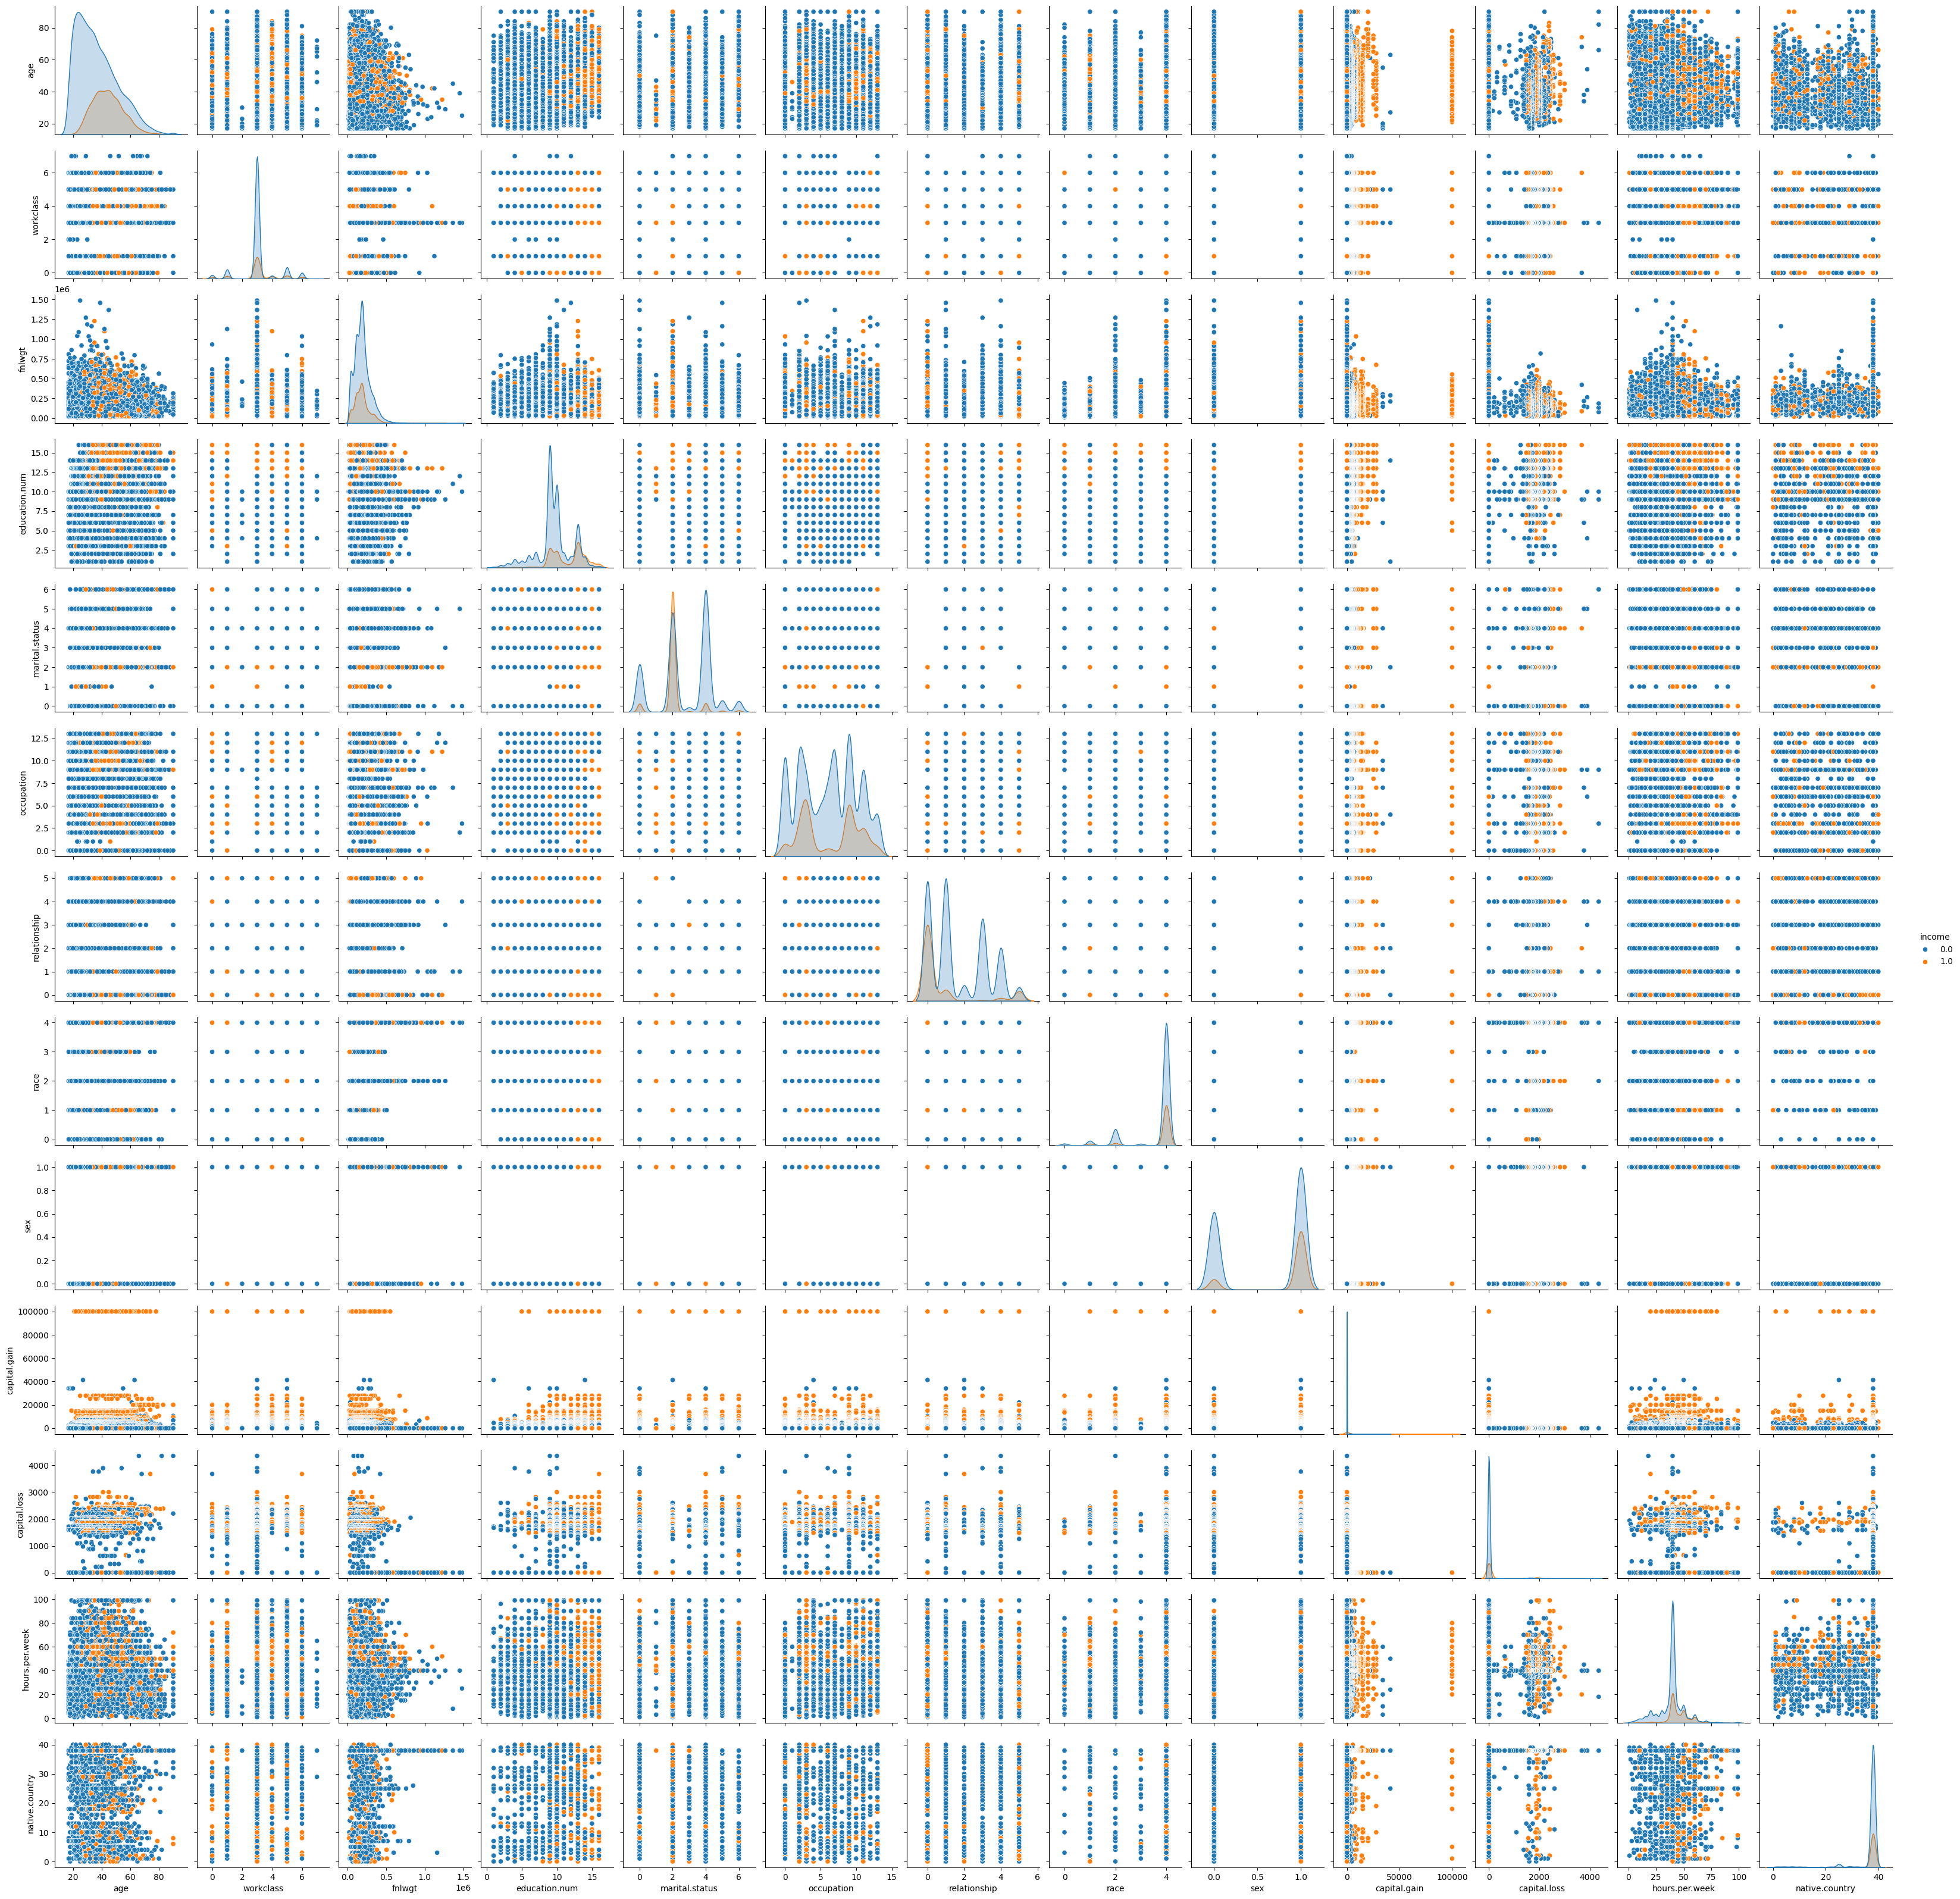

In [268]:
sns.pairplot(data=df3, vars=df3.columns[:-1],hue='income')

In [270]:
df3 = df.loc[:,['age','workclass','marital.status','race','sex']]
df3[df3=='?'] = np.nan
df3.head()

age workclass marital.status   race     sex
0   90       NaN        Widowed  White  Female
1   82   Private        Widowed  White  Female
2   66       NaN        Widowed  Black  Female
3   54   Private       Divorced  White  Female
4   41   Private      Separated  White  Female

In [271]:
t=df3.isna().sum() # column만
for col in t[t>0].index:
    df3[col] = df3[col].fillna(df3[col].mode()[0])

In [272]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   marital.status  32561 non-null  object
 3   race            32561 non-null  object
 4   sex             32561 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [276]:
# onehot, 범주형만 적용됨
# pd.get_dummies(df3)
counts, bins = np.histogram(df3['age'],bins=10)
labels = range(len(bins)-1)

bins[0] = min(df3['age'])-1
bins[-1] = max(df3['age'])

print(bins, list(labels))
df3['age'] = pd.cut(df3['age'],bins=bins,labels=labels)

[17.  24.3 31.6 38.9 46.2 53.5 60.8 68.1 75.4 82.7 90. ] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [277]:
df4 = pd.get_dummies(df3.iloc[:,1:])
df4['age'] = df3['age']
pca = PCA(n_components=20)
df4.head()

workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0               True                   False                       False   
1               True                   False                       False   
2               True                   False                       False   
3               True                   False                       False   
4               True                   False                       False   

   workclass_State-gov  workclass_Without-pay  marital.status_Divorced  \
0                False                  False                    False   
1                False                  False                    False   
2                False                  False                    False   
3                False                  False                     True   
4                False                  False                    False   

   marital.status_Married-AF-spouse  ...  marital.status_Separated  \
0                             False  ...                     False   
1                             False  ...                     False   
2                             False  ...                     False   
3                             False  ...                     False   
4                             False  ...                      True   

   marital.status_Widowed  race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  \
0                    True                    False                    False   
1                    True                    False                    False   
2                    True                    False                    False   
3                   False                    False                    False   
4                   False                    False                    False   

   race_Black  race_Other  race_White  sex_Female  sex_Male  age  
0       False       False        True        True     False    9  
1       False       False        True        True     False    8  
2        True       False       False        True     False    6  
3       False       False        True        True     False    5  
4       False       False        True        True     False    3  

[5 rows x 23 columns]

In [281]:
df3.isna().sum()

age               395
workclass           0
marital.status      0
race                0
sex                 0
dtype: int64

In [282]:
df4 = pca.fit_transform(df4)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [283]:
df4.shape, df['income'].shape
X, y = df4, oe.fit_transform(df[['income']])
y = [int(i[0]) for i in y]
smote = SMOTE(random_state=42)
x_pca_
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [284]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
smote = SMOTE()
print(classification_report(y_test, rfc.fit(X)))

- 데이터는 적당한 차원축소와 편향을 해결하고 순서있는 라벨링을 통해래 그래고 ㅐ새저
- 앙상블에서 배깅의 형태인 랜덤포레스트를 적용한 모델이 가장 우수함

In [285]:
# 하이퍼 파라미터 튜닝

- 데이터 전처리 계획 수립
- 모델링 계획 수립
- 학습